<h1>Вчитување на податочното множество</h1>

<h1>Imports на модули од библиотеки</h1>

In [21]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras import Input
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('../../aud/av10/winequality-white.csv',delimiter=';')

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<h1>Предпроцесирање на податоците</h1>

<h2>Onehot енкодирање</h2>

In [4]:
def one_hot_encoder(f):
    if f < 6:
        return [1,0,0]
    if f == 6:
        return [0,1,0]
    else:
        return [0,0,1]
dataset['quality'] = dataset['quality'].map(lambda x: one_hot_encoder(x))

In [5]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,"[0, 1, 0]"
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,"[0, 1, 0]"
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,"[0, 1, 0]"
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,"[0, 1, 0]"
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,"[0, 1, 0]"


<h2>Нормализација на карактеристиките</h2>

In [6]:
dataset_x = dataset.iloc[:,[i for i in range(0,11)]]

# Normalizacija so pomosh na: normalied=(xi−min(x))/(max(x)−min(x))
column_maxes = dataset_x.max()
df_max = column_maxes.max()
column_mins = dataset_x.min()
df_min = column_mins.min()
normalized_x = (dataset_x - df_min) / (df_max - df_min)

normalized_x['quality'] = dataset.iloc[:,[11]]  # Dodavanje na klasata nazad

dataset = normalized_x  # Setiranje na izvornoto podatocno mnozestvo na normaliziranoto


In [7]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.015909,0.000614,0.000818,0.047045,0.000102,0.102273,0.386364,0.002275,0.006818,0.001023,0.020000,"[0, 1, 0]"
1,0.014318,0.000682,0.000773,0.003636,0.000111,0.031818,0.300000,0.002259,0.007500,0.001114,0.021591,"[0, 1, 0]"
2,0.018409,0.000636,0.000909,0.015682,0.000114,0.068182,0.220455,0.002262,0.007409,0.001000,0.022955,"[0, 1, 0]"
3,0.016364,0.000523,0.000727,0.019318,0.000132,0.106818,0.422727,0.002263,0.007250,0.000909,0.022500,"[0, 1, 0]"
4,0.016364,0.000523,0.000727,0.019318,0.000132,0.106818,0.422727,0.002263,0.007250,0.000909,0.022500,"[0, 1, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.014091,0.000477,0.000659,0.003636,0.000089,0.054545,0.209091,0.002253,0.007432,0.001136,0.025455,"[0, 1, 0]"
4894,0.015000,0.000727,0.000818,0.018182,0.000107,0.129545,0.381818,0.002261,0.007159,0.001045,0.021818,"[1, 0, 0]"
4895,0.014773,0.000545,0.000432,0.002727,0.000093,0.068182,0.252273,0.002256,0.006795,0.001045,0.021364,"[0, 1, 0]"
4896,0.012500,0.000659,0.000682,0.002500,0.000050,0.045455,0.250000,0.002247,0.007591,0.000864,0.029091,"[0, 0, 1]"


<h1>Поделба на податочното множество</h1>

<h2>Поделба на тренинг, валидациско и тест множества</h2>

In [8]:
train = dataset.iloc[0:int(len(dataset)*0.7)]
val = dataset.iloc[int(len(dataset)*0.7):int(len(dataset)*0.8)]
test = dataset.iloc[int(len(dataset)*0.8):]

print('Train shape:\t\t{}'.format(train.shape))
print('Validation shape:\t{}'.format(val.shape))
print('Test shape:\t\t{}'.format(test.shape))

Train shape:		(3428, 12)
Validation shape:	(490, 12)
Test shape:		(980, 12)


<h2>Поделба на секое подмножество на карактеристики и класа (X и Y)</h2>

In [9]:
def split_subset(subset):
    subset_x = subset.drop('quality',axis=1)
    subset_y = subset.loc[:,['quality']]
    return (subset_x, subset_y)

In [10]:
train_x, train_y = split_subset(train)
val_x, val_y = split_subset(val)
test_x, test_y = split_subset(test)

In [11]:
print("{}_x shape:\t{},\t{}_y shape:\t{}".format("train",train_x.shape,"train",train_y.shape))
print("{}_x shape:\t{},\t{}_y shape:\t{}".format("val",val_x.shape,"val",val_y.shape))
print("{}_x shape:\t{},\t{}_y shape:\t{}".format("test",test_x.shape,"test",test_y.shape))

train_x shape:	(3428, 11),	train_y shape:	(3428, 1)
val_x shape:	(490, 11),	val_y shape:	(490, 1)
test_x shape:	(980, 11),	test_y shape:	(980, 1)


In [12]:
# Transformacija vo np.array od ndarrays - format razbirliv za keras, so kojsto se pretvaraat vo tenzori
# TODO: Refactor!!!

train_x = np.array(train_x.values.tolist())
train_y = np.array([t[0] for t in train_y.values.tolist()])

val_x = np.array(val_x.values.tolist())
val_y = np.array([t[0] for t in val_y.values.tolist()])

test_x = np.array(test_x.values.tolist())
test_y = np.array([t[0] for t in test_y.values.tolist()])

<h1>Креирање модел на невронска мрежа</h1>

<h2>Архитектура на невронска мрежа</h2>

In [41]:
# TODO: Neural network arhitecture
model = Sequential()
model.add(Input(11))
model.add(Dense(32, activation='relu', input_shape=(11,), name="first_hidden"))
model.add(Dropout(0.8, input_shape=(11,)))
model.add(Dense(3, activation='softmax', name="output_layer"))

In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_hidden (Dense)         (None, 32)                384       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
output_layer (Dense)         (None, 3)                 99        
Total params: 483
Trainable params: 483
Non-trainable params: 0
_________________________________________________________________


<h2>Тренирање и валидирање на моделот</h2>

<h3>Тренирање</h3>

In [43]:
BATCH_SIZE=4096
EPOCHS=400
# TODO: Train the neural network
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss=categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x=train_x, y=train_y, validation_data=(val_x, val_y), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=2)

Epoch 1/400
1/1 - 0s - loss: 1.1043 - accuracy: 0.3381 - val_loss: 1.1021 - val_accuracy: 0.2878
Epoch 2/400
1/1 - 0s - loss: 1.0995 - accuracy: 0.3623 - val_loss: 1.1013 - val_accuracy: 0.2878
Epoch 3/400
1/1 - 0s - loss: 1.0989 - accuracy: 0.3544 - val_loss: 1.1004 - val_accuracy: 0.2878
Epoch 4/400
1/1 - 0s - loss: 1.0985 - accuracy: 0.3574 - val_loss: 1.0996 - val_accuracy: 0.2878
Epoch 5/400
1/1 - 0s - loss: 1.0978 - accuracy: 0.3550 - val_loss: 1.0989 - val_accuracy: 0.2857
Epoch 6/400
1/1 - 0s - loss: 1.0983 - accuracy: 0.3641 - val_loss: 1.0981 - val_accuracy: 0.2837
Epoch 7/400
1/1 - 0s - loss: 1.0932 - accuracy: 0.3705 - val_loss: 1.0973 - val_accuracy: 0.2837
Epoch 8/400
1/1 - 0s - loss: 1.0942 - accuracy: 0.3646 - val_loss: 1.0966 - val_accuracy: 0.2816
Epoch 9/400
1/1 - 0s - loss: 1.0963 - accuracy: 0.3530 - val_loss: 1.0958 - val_accuracy: 0.2796
Epoch 10/400
1/1 - 0s - loss: 1.0918 - accuracy: 0.3749 - val_loss: 1.0951 - val_accuracy: 0.2776
Epoch 11/400
1/1 - 0s - loss:

Epoch 85/400
1/1 - 0s - loss: 1.0695 - accuracy: 0.4312 - val_loss: 1.0777 - val_accuracy: 0.4408
Epoch 86/400
1/1 - 0s - loss: 1.0682 - accuracy: 0.4282 - val_loss: 1.0777 - val_accuracy: 0.4408
Epoch 87/400
1/1 - 0s - loss: 1.0659 - accuracy: 0.4338 - val_loss: 1.0777 - val_accuracy: 0.4408
Epoch 88/400
1/1 - 0s - loss: 1.0650 - accuracy: 0.4268 - val_loss: 1.0776 - val_accuracy: 0.4408
Epoch 89/400
1/1 - 0s - loss: 1.0647 - accuracy: 0.4268 - val_loss: 1.0776 - val_accuracy: 0.4408
Epoch 90/400
1/1 - 0s - loss: 1.0698 - accuracy: 0.4186 - val_loss: 1.0776 - val_accuracy: 0.4408
Epoch 91/400
1/1 - 0s - loss: 1.0663 - accuracy: 0.4242 - val_loss: 1.0775 - val_accuracy: 0.4408
Epoch 92/400
1/1 - 0s - loss: 1.0733 - accuracy: 0.4154 - val_loss: 1.0775 - val_accuracy: 0.4408
Epoch 93/400
1/1 - 0s - loss: 1.0682 - accuracy: 0.4242 - val_loss: 1.0774 - val_accuracy: 0.4408
Epoch 94/400
1/1 - 0s - loss: 1.0717 - accuracy: 0.4215 - val_loss: 1.0774 - val_accuracy: 0.4408
Epoch 95/400
1/1 - 0

Epoch 168/400
1/1 - 0s - loss: 1.0613 - accuracy: 0.4312 - val_loss: 1.0745 - val_accuracy: 0.4408
Epoch 169/400
1/1 - 0s - loss: 1.0653 - accuracy: 0.4218 - val_loss: 1.0745 - val_accuracy: 0.4408
Epoch 170/400
1/1 - 0s - loss: 1.0645 - accuracy: 0.4242 - val_loss: 1.0744 - val_accuracy: 0.4408
Epoch 171/400
1/1 - 0s - loss: 1.0617 - accuracy: 0.4294 - val_loss: 1.0744 - val_accuracy: 0.4408
Epoch 172/400
1/1 - 0s - loss: 1.0623 - accuracy: 0.4277 - val_loss: 1.0743 - val_accuracy: 0.4408
Epoch 173/400
1/1 - 0s - loss: 1.0655 - accuracy: 0.4277 - val_loss: 1.0743 - val_accuracy: 0.4408
Epoch 174/400
1/1 - 0s - loss: 1.0653 - accuracy: 0.4300 - val_loss: 1.0742 - val_accuracy: 0.4408
Epoch 175/400
1/1 - 0s - loss: 1.0605 - accuracy: 0.4282 - val_loss: 1.0742 - val_accuracy: 0.4408
Epoch 176/400
1/1 - 0s - loss: 1.0628 - accuracy: 0.4262 - val_loss: 1.0742 - val_accuracy: 0.4408
Epoch 177/400
1/1 - 0s - loss: 1.0645 - accuracy: 0.4262 - val_loss: 1.0741 - val_accuracy: 0.4408
Epoch 178/

Epoch 251/400
1/1 - 0s - loss: 1.0580 - accuracy: 0.4271 - val_loss: 1.0703 - val_accuracy: 0.4408
Epoch 252/400
1/1 - 0s - loss: 1.0575 - accuracy: 0.4309 - val_loss: 1.0702 - val_accuracy: 0.4408
Epoch 253/400
1/1 - 0s - loss: 1.0560 - accuracy: 0.4262 - val_loss: 1.0701 - val_accuracy: 0.4408
Epoch 254/400
1/1 - 0s - loss: 1.0559 - accuracy: 0.4268 - val_loss: 1.0701 - val_accuracy: 0.4408
Epoch 255/400
1/1 - 0s - loss: 1.0582 - accuracy: 0.4306 - val_loss: 1.0700 - val_accuracy: 0.4408
Epoch 256/400
1/1 - 0s - loss: 1.0595 - accuracy: 0.4335 - val_loss: 1.0699 - val_accuracy: 0.4408
Epoch 257/400
1/1 - 0s - loss: 1.0563 - accuracy: 0.4317 - val_loss: 1.0698 - val_accuracy: 0.4408
Epoch 258/400
1/1 - 0s - loss: 1.0557 - accuracy: 0.4309 - val_loss: 1.0697 - val_accuracy: 0.4408
Epoch 259/400
1/1 - 0s - loss: 1.0560 - accuracy: 0.4312 - val_loss: 1.0696 - val_accuracy: 0.4408
Epoch 260/400
1/1 - 0s - loss: 1.0558 - accuracy: 0.4332 - val_loss: 1.0695 - val_accuracy: 0.4408
Epoch 261/

Epoch 334/400
1/1 - 0s - loss: 1.0526 - accuracy: 0.4382 - val_loss: 1.0644 - val_accuracy: 0.4449
Epoch 335/400
1/1 - 0s - loss: 1.0529 - accuracy: 0.4227 - val_loss: 1.0644 - val_accuracy: 0.4449
Epoch 336/400
1/1 - 0s - loss: 1.0541 - accuracy: 0.4312 - val_loss: 1.0643 - val_accuracy: 0.4449
Epoch 337/400
1/1 - 0s - loss: 1.0524 - accuracy: 0.4355 - val_loss: 1.0642 - val_accuracy: 0.4449
Epoch 338/400
1/1 - 0s - loss: 1.0548 - accuracy: 0.4221 - val_loss: 1.0642 - val_accuracy: 0.4449
Epoch 339/400
1/1 - 0s - loss: 1.0531 - accuracy: 0.4218 - val_loss: 1.0641 - val_accuracy: 0.4449
Epoch 340/400
1/1 - 0s - loss: 1.0517 - accuracy: 0.4309 - val_loss: 1.0640 - val_accuracy: 0.4449
Epoch 341/400
1/1 - 0s - loss: 1.0510 - accuracy: 0.4349 - val_loss: 1.0640 - val_accuracy: 0.4449
Epoch 342/400
1/1 - 0s - loss: 1.0509 - accuracy: 0.4349 - val_loss: 1.0639 - val_accuracy: 0.4449
Epoch 343/400
1/1 - 0s - loss: 1.0524 - accuracy: 0.4282 - val_loss: 1.0639 - val_accuracy: 0.4449
Epoch 344/

<h3>Визуелизација на функцијата на загуба</h3>

In [16]:
# TODO: Visualize loss
def visualize(metric):
    plt.plot(history.history[f'{metric}'])
    plt.plot(history.history[f'val_{metric}'])
    plt.title(f'Model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

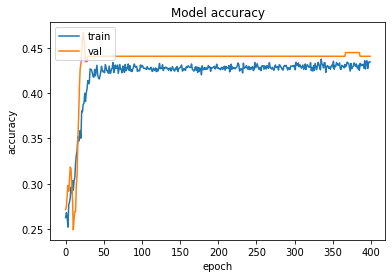

In [37]:
visualize("accuracy")

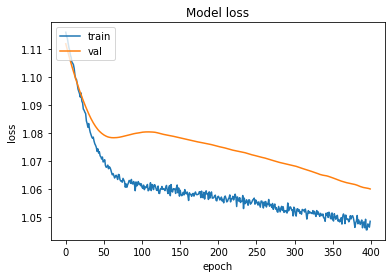

In [38]:
visualize("loss")

<h2>Тестирање на моделот</h2>

<h3>Тестирање</h3>


In [44]:
# TODO: Test
results = model.evaluate(test_x,test_y, batch_size=128)

8/8 [==============================] - 0s 2ms/step - loss: 1.0142 - accuracy: 0.5296


<h3>Анализа и визуелизација на перформансот врз тест множеството</h3>


In [20]:
# TODO: Analyize and visualize performance on the test set

<h1>A. Промена на број на неврони</h1>

<h1>Б. Промена на број на слоеви</h1>

<h1>В. Додавање слоеви за регуларизација</h1>

<h1>Заклучоци</h1>

П: Како се менуваат перформансите на моделот доколку се промени бројот на неврони? 
<br>
О: 

П: Како се менуваат перформансите на моделот доколку се промени бројот на слоеви? 
<br>
О: 

П: Како се менуваат перформансите на моделот доколку се додадат слоеви за регуларизација? 
<br>
О: 